In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## PAN15 dataset

In [2]:
pan15 = pd.read_csv('../datasets/pan15_semicleaned.tsv' , sep='\t')
pan15.sample(10)

,author,gender,age_group,documents,semicleaned,tokenized,pos_fw
5819,9f4ca5ba,M,50-XX,"well, i've mown the lawn, done my email, duste...","well, i've mown the lawn, done my email, duste...","well , I 've mow the lawn , do my email , dust...","well , I ' AUX VERB the NOUN , do my NOUN , VE..."
9602,2aa1a2fb,M,18-24,I don't want to be awake right now ????\t\t,i don't want to be awake right now ?,I do not want to be awake right now ?,I do not VERB to be ADJ ADV now ?
2356,f28ad171,F,35-49,Fountain of Youth: Do HGH Pills Work? http://t...,fountain of youth: do hgh pills work?,fountain of youth : do hgh pill work ?,NOUN of NOUN : do NOUN NOUN NOUN ?
6891,2b27ab92,M,25-34,Are You Ready for the Changes Coming to Social...,are you ready for the changes coming to social...,be you ready for the change come to social med...,be you ADJ for the NOUN VERB to ADJ NOUN ? via
8525,b172e999,M,25-34,LEO = Low Earth Orbit\nMEO = Medium Earth Orbi...,leo = low earth orbit meo = medium earth orbit...,leo = low earth orbit meo = medium earth orbit...,PROPN PROPN ADJ NOUN NOUN NOUN PUNCT ADJ NOUN ...
5586,18fc8412,F,18-24,Thank you!!!! :D RT @username: @username YUUUU...,thank you! :d rt : yuuuuukieeeeee happy bday!,thank you ! : d rt : yuuuuukieeeeee happy bday !,VERB you ! : X NOUN : NOUN ADJ PROPN !
14030,e11d4b1e,M,25-34,"I'm at La Pescadorita (Humboldt 1905, Costa Ri...","i'm at la pescadorita (humboldt 1905, costa ri...","I be at la pescadorita ( humboldt 1905 , costa...","I be at PROPN PROPN ( PROPN NUM , PROPN PROPN ..."
6087,99710477,M,25-34,Strike while the iron is hot...\t\t,strike while the iron is hot.,strike while the iron be hot .,VERB while the NOUN be ADJ .
12893,c657394c,F,35-49,Kale is the new bacon #LOL\t\t,kale is the new bacon,kale be the new bacon,PROPN be the ADJ NOUN
7124,fd7c89ad,F,18-24,Hufflepuff'a girsem Hogwarts'tan mezun oldum b...,hufflepuff'a girsem hogwarts'tan mezun oldum b...,hufflepuff'a girsem hogwarts'tan mezun oldum b...,ADJ NOUN PROPN NOUN ADJ PROPN PROPN PROPN .


In [4]:
pan15 = pan15[['gender', 'age_group', 'pos_fw']]
pan15.shape

(14166, 3)

In [75]:
pan15['age_group'].value_counts()

25-34    5616
18-24    5588
35-49    1865
50-XX    1088
Name: age_group, dtype: int64

In [6]:
enc = LabelEncoder()
pan15['gender'] = enc.fit_transform(pan15['gender'])
pan15['age_group'] = enc.fit_transform(pan15['age_group'])

pan15.sample(5)

,gender,age_group,pos_fw
8940,1,0,ADJ NOUN PROPN PROPN I for NOUN ( NOUN )
11789,0,0,VERB at the NOUN VERB how they VERB for PROPN !
10766,1,0,"NOUN should be a NOUN 's ADJ NOUN , VERB we ."
2210,1,0,""" : VERB I to be she . for VERB you VERB PROPN ?"
10333,0,3,everywhere you go - NOUN in ADJ NOUN : via - y...


In [11]:
print(pan15.shape)
pan15.dropna(inplace=True)
print(pan15.shape)

(14166, 3)
(14157, 3)


### Gender classification

In [25]:
X = pan15['pos_fw']
y = pan15['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=97, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11325,), (2832,), (11325,), (2832,))

In [33]:
vect = TfidfVectorizer()
svm = SVC(kernel='linear')

pipe = make_pipeline(vect, svm)
pipe.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer', TfidfVectorizer()),
  ('svc', SVC(kernel='linear'))],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(),
 'svc': SVC(kernel='linear'),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 1.0,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': None,
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidfvectorizer__tokenizer': None,
 'tfidfvectorizer__use_idf': True,
 'tfidfvectorizer__vocabulary': No

In [34]:
param_grid = {
    'verbose': [2],
    'tfidfvectorizer__ngram_range': [(2, 3)],
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [35]:
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=3, refit=True)
gs.fit(X_train, y_train)
print(f'\n' + '-' * 50)
print('Best parameters:', gs.best_params_)
print('Best score:', gs.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   0.9s
[Pipeline] ............... (step 2 of 2) Processing svc, total=  43.4s

--------------------------------------------------
Best parameters: {'svc__C': 1, 'svc__gamma': 0.001, 'tfidfvectorizer__ngram_range': (2, 3), 'verbose': 2}
0.584507823488914
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(2, 3))),
                ('svc', SVC(C=1, gamma=0.001, kernel='linear'))],
         verbose=2)


              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1435
           1       0.60      0.58      0.59      1397

    accuracy                           0.61      2832
   macro avg       0.61      0.61      0.61      2832
weighted avg       0.61      0.61      0.61      2832



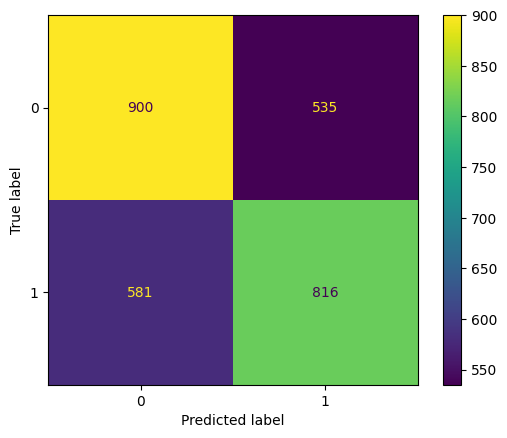

In [37]:
y_test_pred = gs.predict(X_test)
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.plot();

### On tokenized data

In [68]:
X = pan15['tokenized']
y = pan15['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=97, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11325,), (2832,), (11325,), (2832,))

In [69]:
vect = TfidfVectorizer()
svm = SVC(kernel='linear')

pipe = make_pipeline(vect, svm)
pipe.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer', TfidfVectorizer()),
  ('svc', SVC(kernel='linear'))],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(),
 'svc': SVC(kernel='linear'),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 1.0,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': None,
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidfvectorizer__tokenizer': None,
 'tfidfvectorizer__use_idf': True,
 'tfidfvectorizer__vocabulary': No

In [70]:
param_grid = {
    'verbose': [2],
    'tfidfvectorizer__ngram_range': [(2, 3)],
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [71]:
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=3, refit=True)
gs.fit(X_train, y_train)
print(f'\n' + '-' * 50)
print('Best parameters:', gs.best_params_)
print('Best score:', gs.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   1.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=  57.2s

--------------------------------------------------
Best parameters: {'svc__C': 1, 'svc__gamma': 0.001, 'tfidfvectorizer__ngram_range': (2, 3), 'verbose': 2}
Best score: 0.614367867398095


              precision    recall  f1-score   support

           F       0.64      0.59      0.61      1435
           M       0.61      0.65      0.63      1397

    accuracy                           0.62      2832
   macro avg       0.62      0.62      0.62      2832
weighted avg       0.62      0.62      0.62      2832



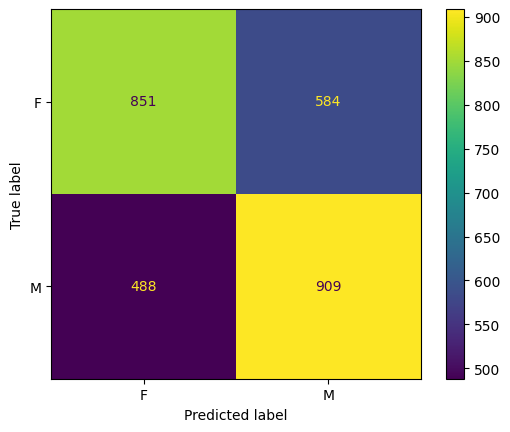

In [72]:
y_test_pred = gs.predict(X_test)
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.plot();

### Age group classification

In [38]:
X = pan15['pos_fw']
y = pan15['age_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=97, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11325,), (2832,), (11325,), (2832,))

In [39]:
vect = TfidfVectorizer()
svm = SVC(kernel='linear')

pipe = make_pipeline(vect, svm)
pipe.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer', TfidfVectorizer()),
  ('svc', SVC(kernel='linear'))],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(),
 'svc': SVC(kernel='linear'),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 1.0,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': None,
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidfvectorizer__tokenizer': None,
 'tfidfvectorizer__use_idf': True,
 'tfidfvectorizer__vocabulary': No

In [40]:
param_grid = {
    'verbose': [2],
    'tfidfvectorizer__ngram_range': [(2, 3)],
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [41]:
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2, refit=True)
gs.fit(X_train, y_train)
print(f'\n' + '-' * 50)
print('Best parameters:', gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   0.7s
[Pipeline] ............... (step 2 of 2) Processing svc, total= 1.2min

--------------------------------------------------
Best parameters: {'svc__C': 10, 'svc__gamma': 0.001, 'tfidfvectorizer__ngram_range': (2, 3), 'verbose': 2}
0.3816366390108142
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(2, 3))),
                ('svc', SVC(C=10, gamma=0.001, kernel='linear'))],
         verbose=2)


              precision    recall  f1-score   support

           0       0.56      0.63      0.59      1118
           1       0.52      0.54      0.53      1123
           2       0.32      0.23      0.27       373
           3       0.19      0.10      0.13       218

    accuracy                           0.50      2832
   macro avg       0.40      0.38      0.38      2832
weighted avg       0.48      0.50      0.49      2832



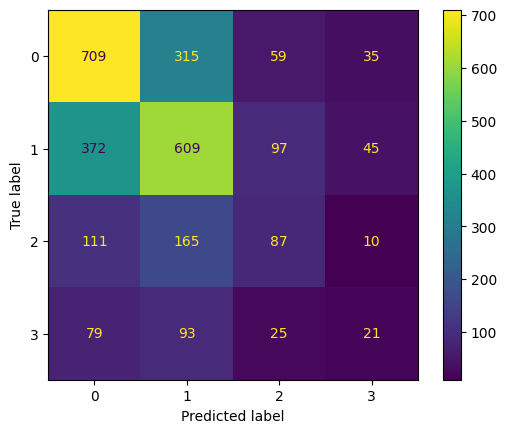

In [42]:
y_test_pred = gs.predict(X_test)
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.plot();

> The model performs relatively well when it comes to the first 2 age groups (18-24 and 25-34) whereas it seriously struggles with the other ones.

### Subset of authors aged 18-34

In [74]:
young_adults = pan15.loc[(pan15['age_group'] == '18-24') | (pan15['age_group'] == '25-34')]
young_adults.shape

(11204, 7)

In [82]:
X = young_adults['tokenized']
y = young_adults['age_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=97, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8963,), (2241,), (8963,), (2241,))

In [83]:
X.isna().sum(), y.isna().sum()

(0, 0)

In [84]:
vect = TfidfVectorizer()
svm = SVC(kernel='linear')

pipe = make_pipeline(vect, svm)
pipe.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer', TfidfVectorizer()),
  ('svc', SVC(kernel='linear'))],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(),
 'svc': SVC(kernel='linear'),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 1.0,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': None,
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidfvectorizer__tokenizer': None,
 'tfidfvectorizer__use_idf': True,
 'tfidfvectorizer__vocabulary': No

In [85]:
param_grid = {
    'verbose': [2],
    'tfidfvectorizer__ngram_range': [(2, 3)],
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [86]:
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2, refit=True)
gs.fit(X_train, y_train)
print(f'\n' + '-' * 50)
print('Best parameters:', gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   1.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total= 1.1min

--------------------------------------------------
Best parameters: {'svc__C': 10, 'svc__gamma': 0.001, 'tfidfvectorizer__ngram_range': (2, 3), 'verbose': 2}
0.6677875692750102
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(2, 3))),
                ('svc', SVC(C=10, gamma=0.001, kernel='linear'))],
         verbose=2)


              precision    recall  f1-score   support

       18-24       0.64      0.79      0.71      1118
       25-34       0.73      0.56      0.63      1123

    accuracy                           0.67      2241
   macro avg       0.68      0.67      0.67      2241
weighted avg       0.68      0.67      0.67      2241



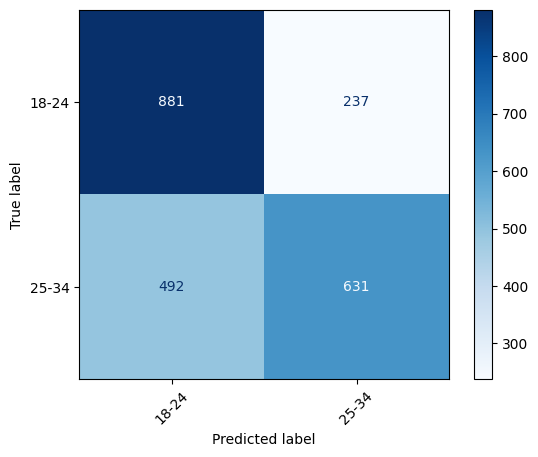

In [89]:
y_test_pred = gs.predict(X_test)
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.plot(cmap='Blues', xticks_rotation=45);

### On tokenized data

In [58]:
pan15 = pd.read_csv('../datasets/pan15_semicleaned.tsv' , sep='\t')

((11332,), (2834,), (11332,), (2834,))

In [60]:
pan15.dropna(inplace=True)

In [61]:
X = pan15['tokenized']
y = pan15['age_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=97, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11325,), (2832,), (11325,), (2832,))

In [62]:
X.isna().sum(), y.isna().sum()

(0, 0)

In [64]:
vect = TfidfVectorizer()
svm = SVC(kernel='linear')

pipe = make_pipeline(vect, svm)
pipe.get_params()

{'memory': None,
 'steps': [('tfidfvectorizer', TfidfVectorizer()),
  ('svc', SVC(kernel='linear'))],
 'verbose': False,
 'tfidfvectorizer': TfidfVectorizer(),
 'svc': SVC(kernel='linear'),
 'tfidfvectorizer__analyzer': 'word',
 'tfidfvectorizer__binary': False,
 'tfidfvectorizer__decode_error': 'strict',
 'tfidfvectorizer__dtype': numpy.float64,
 'tfidfvectorizer__encoding': 'utf-8',
 'tfidfvectorizer__input': 'content',
 'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_df': 1.0,
 'tfidfvectorizer__max_features': None,
 'tfidfvectorizer__min_df': 1,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__norm': 'l2',
 'tfidfvectorizer__preprocessor': None,
 'tfidfvectorizer__smooth_idf': True,
 'tfidfvectorizer__stop_words': None,
 'tfidfvectorizer__strip_accents': None,
 'tfidfvectorizer__sublinear_tf': False,
 'tfidfvectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidfvectorizer__tokenizer': None,
 'tfidfvectorizer__use_idf': True,
 'tfidfvectorizer__vocabulary': No

In [65]:
param_grid = {
    'verbose': [2],
    'tfidfvectorizer__ngram_range': [(2, 3)],
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [66]:
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2, refit=True)
gs.fit(X_train, y_train)
print(f'\n' + '-' * 50)
print('Best parameters:', gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   1.1s
[Pipeline] ............... (step 2 of 2) Processing svc, total= 1.4min

--------------------------------------------------
Best parameters: {'svc__C': 10, 'svc__gamma': 0.001, 'tfidfvectorizer__ngram_range': (2, 3), 'verbose': 2}
0.43624579337462777
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(2, 3))),
                ('svc', SVC(C=10, gamma=0.001, kernel='linear'))],
         verbose=2)


              precision    recall  f1-score   support

       18-24       0.55      0.78      0.65      1118
       25-34       0.59      0.53      0.56      1123
       35-49       0.68      0.34      0.45       373
       50-XX       0.45      0.11      0.17       218

    accuracy                           0.57      2832
   macro avg       0.57      0.44      0.46      2832
weighted avg       0.57      0.57      0.55      2832



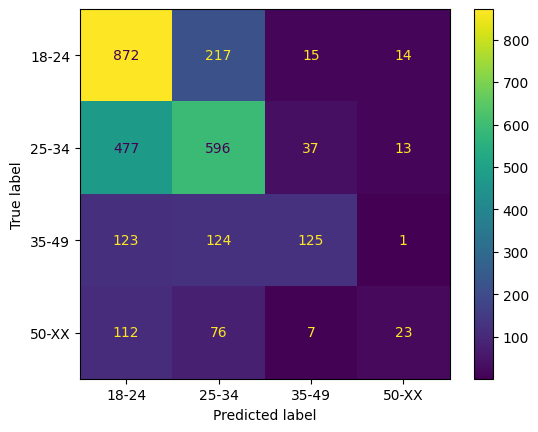

In [67]:
y_test_pred = gs.predict(X_test)
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.plot();

## Blog authorship corpus 

In [2]:
df = pd.read_csv('../datasets/blog_authorship.tsv' , sep='\t', usecols=['text', 'gender', 'age', 'length'])
df.sample(15)

,text,gender,age,length
599138,"Woke up at 11:30 AM. Now in my lab, about to ...",male,24,251
409103,"This weekend was so much fun, I went to San Di...",female,24,461
331646,"The lights are dimmed, my headphones are on (S...",male,16,1569
311440,Hey all- I am exhausted and in a place that I ...,male,26,75
523018,I wrote a sweet litl number for Princey in my ...,male,15,175
305374,"Consider the phrase: ""I always lie"" . â Pr...",male,25,138
75954,"hey all, sorry i've not posted in a while! i t...",female,14,21
546629,"I am going to see I, Robot tonight. So tomorro...",female,17,60
97624,11:30am.,male,17,1
637865,*yerf* Seems to me that spring has reared its ...,male,16,193


In [3]:
df.shape

(727712, 4)

In [4]:
blogs = df.sample(frac=.05)
blogs.shape

(36386, 4)

In [5]:
blogs.dropna(inplace=True)
blogs.shape

(36386, 4)

In [6]:
blogs['gender'].value_counts()

male      18546
female    17840
Name: gender, dtype: int64

In [7]:
enc = LabelEncoder()
blogs['gender'] = enc.fit_transform(blogs['gender'])

### Gender prediction

In [8]:
X = blogs['text']
y = blogs['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=97, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29108,), (7278,), (29108,), (7278,))

In [9]:
X.isna().sum(), y.isna().sum()

(0, 0)

In [10]:
vect = TfidfVectorizer()
svm = SVC(kernel='linear')

pipe = make_pipeline(vect, svm)

In [11]:
param_grid = {
    'verbose': [2],
    'tfidfvectorizer__ngram_range': [(1, 2), (2, 2), (2, 3)],
    'svc__C': [0.001, 0.01, 0.1, 1, 10],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10],
}

In [12]:
gs = GridSearchCV(pipe, param_grid, cv=2, scoring='f1_macro', n_jobs=-1, verbose=2, refit=True)
gs.fit(X_train, y_train)
print(f'\n' + '-' * 50)
print('Best parameters:', gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

Fitting 2 folds for each of 75 candidates, totalling 150 fits
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=  33.5s
[Pipeline] .............. (step 2 of 2) Processing svc, total=108.9min

--------------------------------------------------
Best parameters: {'svc__C': 1, 'svc__gamma': 0.001, 'tfidfvectorizer__ngram_range': (1, 2), 'verbose': 2}
0.654639430731982
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('svc', SVC(C=1, gamma=0.001, kernel='linear'))],
         verbose=2)


              precision    recall  f1-score   support

           0       0.66      0.65      0.66      3568
           1       0.67      0.68      0.67      3710

    accuracy                           0.67      7278
   macro avg       0.67      0.67      0.67      7278
weighted avg       0.67      0.67      0.67      7278



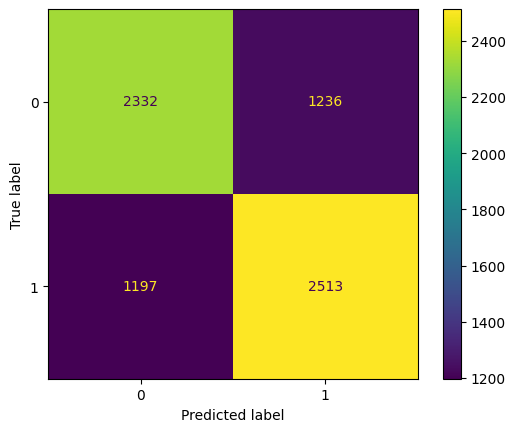

In [13]:
y_test_pred = gs.predict(X_test)
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.plot();

### Age prediction

In [2]:
full_df = pd.read_csv('../datasets/blog_authorship.tsv' , sep='\t', usecols=['text', 'age', 'length'])
full_df.shape

(727712, 3)

In [3]:
# Transform age into age groups as in the PAN15 dataset
bins    = [18, 24, 34, 50, 100]
labels  = ['18-24', '25-34', '35-50', '50-ΧΧ']
full_df['age_group'] = pd.cut(full_df['age'], bins=bins, labels=labels)
full_df['age_group'].value_counts()

25-34    222498
18-24    166395
35-50     91435
50-ΧΧ         0
Name: age_group, dtype: int64

In [4]:
print(full_df.shape)
full_df = full_df[full_df['age'] >= 18] # Remove entries written by teenagers
print(full_df.shape)

(727712, 4)
(480328, 4)


In [5]:
df = full_df.sample(frac=.035)
print(f'From {full_df.shape[0]:,} rows to just {df.shape[0]:,}')

From 480,328 rows to just 16,811


In [6]:
df['age_group'].value_counts()

25-34    7711
18-24    5889
35-50    3211
50-ΧΧ       0
Name: age_group, dtype: int64

In [14]:
X = df['text']
y = df['age_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=97, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13448,), (3363,), (13448,), (3363,))

In [15]:
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
svm = SVC(kernel='linear')

pipe = make_pipeline(vect, svm)

In [16]:
param_grid = {
    'verbose': [10],
    'svc__C': [0.001, 0.01, 0.1, 1, 10],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10],
}

In [17]:
gs = GridSearchCV(pipe, param_grid, cv=2, scoring='f1_macro', n_jobs=-1, verbose=10, refit=True)
gs.fit(X_train, y_train)
print(f'\n' + '-' * 50)
print('Best parameters:', gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

Fitting 2 folds for each of 25 candidates, totalling 50 fits
[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=  14.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=12.4min

--------------------------------------------------
Best parameters: {'svc__C': 10, 'svc__gamma': 0.001, 'verbose': 10}
0.38964879431289795
Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('svc', SVC(C=10, gamma=0.001, kernel='linear'))],
         verbose=10)


              precision    recall  f1-score   support

       18-24       0.38      0.42      0.40      1178
       25-34       0.46      0.46      0.46      1543
       35-50       0.33      0.26      0.29       642

    accuracy                           0.41      3363
   macro avg       0.39      0.38      0.38      3363
weighted avg       0.41      0.41      0.41      3363



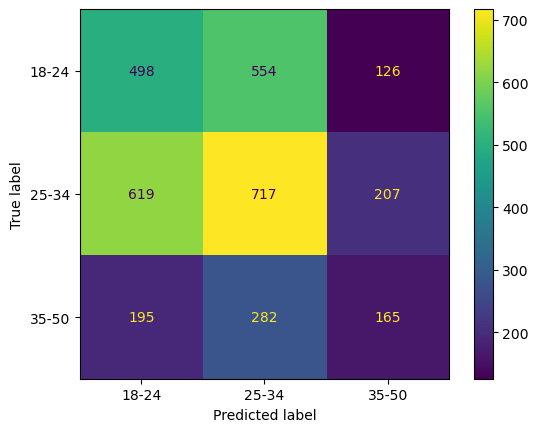

In [19]:
y_test_pred = gs.predict(X_test)
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.plot();

### Make problem binary: <25 or >25 years old

In [21]:
# Transform age into binary variable
full_df['adult'] = np.where(full_df['age'] < 25, 0, 1)
full_df['adult'].value_counts()

1    313933
0    166395
Name: adult, dtype: int64

In [22]:
full_df.sample(15)

,text,age,length,age_group,adult
280662,9. Ignorance,27,2,25-34,1
613321,"""I'm tails you're heads, mmm... tails! I break!""",25,8,25-34,1
34699,**Went out and found some more work for us. Do...,25,1609,25-34,1
33371,India : Telecom & Broadband Growth India has...,26,347,25-34,1
449468,"urlLink It's amazing, they're not even drun...",27,11,25-34,1
87749,"I'm at work. Until yesterday, I was pretty en...",33,708,25-34,1
425041,I don't know that anyone who reads this blog w...,35,258,35-50,1
397826,"I don't care what these say, so I am just goin...",24,610,18-24,0
198876,im in melbourne now.. after 10 hours road trip...,24,108,18-24,0
351694,A STUDY by a firm offering insurance against l...,26,29,25-34,1


In [23]:
df = full_df.sample(frac=.05)
print(f'From {full_df.shape[0]:,} rows to just {df.shape[0]:,}')

From 480,328 rows to just 24,016


In [24]:
df['adult'].value_counts()

1    15671
0     8345
Name: adult, dtype: int64

In [25]:
X = df['text']
y = df['adult']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=97, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19212,), (4804,), (19212,), (4804,))

In [27]:
vect = TfidfVectorizer(max_features=10000)
svm = SVC(kernel='linear')

pipe = make_pipeline(vect, svm)

In [28]:
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 2), (2, 2), (2, 3)],
    'svc__C': [0.001, 0.01, 0.1, 1],
    'svc__gamma': [0.001],
}

In [29]:
gs = GridSearchCV(pipe, param_grid, cv=2, scoring='f1_macro', n_jobs=-1, verbose=10, refit=True)
gs.fit(X_train, y_train)
print(f'\n' + '-' * 50)
print('Best parameters:', gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits

--------------------------------------------------
Best parameters: {'svc__C': 1, 'svc__gamma': 0.001, 'tfidfvectorizer__ngram_range': (1, 2)}
0.5113122874728793
Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('svc', SVC(C=1, gamma=0.001, kernel='linear'))])


              precision    recall  f1-score   support

           0       0.48      0.17      0.25      1669
           1       0.67      0.90      0.77      3135

    accuracy                           0.65      4804
   macro avg       0.58      0.54      0.51      4804
weighted avg       0.61      0.65      0.59      4804



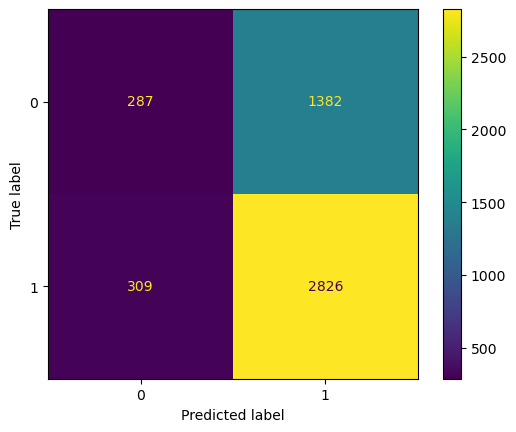

In [30]:
y_test_pred = gs.predict(X_test)
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs.classes_)
disp.plot();